# Project: Wrangling and Analyze Data

## Load Libraries

In [1]:
#Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import requests
import tweepy 
import json 

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#Load twitter archive CSV
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
#Download Image Predictions from URL
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [5]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:

consumer_key = 'auoK1GIxEC4tVe3tkJs21WKnQ'
consumer_secret = 'XUmcEjbNvqI9YA9lWSBadCo7fk6zGBq49j3fGGAFFdiP4fhLV5'
access_token = '150818107-DDYJbTvhpJR3sRKcOUyWghZrs4SpBDOm40tF4wcW'
access_secret = 'BtFug6V45yTQ8VZ5zo3bAHDB2ucB4poytlC5Uikr8Njn5'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [7]:
#Download Tweepy status object based on tweet ID and store in list
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for tweet_id in twitter_archive['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

Rate limit reached. Sleeping for: 728
Rate limit reached. Sleeping for: 732


In [8]:
#Printing 
print("The list of tweets" ,len(list_of_tweets))
print("The list of tweets not found" , len(cant_find_tweets_for_those_ids))

The list of tweets 2328
The list of tweets not found 28


In [9]:
#Isolate the json part of each tweepy 
#status object that we have downloaded and we add them all into a list
my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet)

In [10]:
#Write list into a txt file:
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [11]:
#identify information of interest from JSON dictionaries in txt file
#and put it in a dataframe called tweet JSON
my_demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        friends_count = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])

In [12]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,34493,7179,9050089,20,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,29914,5391,9050089,20,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22516,3555,9050089,20,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,37738,7400,9050090,20,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36033,7938,9050089,20,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### Visual Assessment

Dataframes displayed in notebook and opened separately in excel for visual scrutiny.

In [13]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [14]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [15]:
tweet_json

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,34493,7179,9050089,20,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,29914,5391,9050089,20,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22516,3555,9050089,20,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,37738,7400,9050090,20,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36033,7938,9050089,20,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
5,891087950875897856,18182,2668,9050089,20,Twitter for iPhone,Original tweet,https://t.co/xx5cilW0Dd
6,890971913173991426,10587,1712,9050089,20,Twitter for iPhone,Original tweet,https://t.co/MV01Q820LT
7,890729181411237888,58061,16151,9050089,20,Twitter for iPhone,Original tweet,https://t.co/hrcFOGi12V
8,890609185150312448,25031,3702,9050089,20,Twitter for iPhone,Original tweet,https://t.co/UkrdQyoYxV
9,890240255349198849,28552,6236,9050089,20,Twitter for iPhone,Original tweet,https://t.co/l3TSS3o2M0


#### Programmatic Assessment

In [16]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
sum(twitter_archive['tweet_id'].duplicated())

0

In [18]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [19]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [20]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [21]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [22]:
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Penny         10
Tucker        10
Lola          10
Winston        9
Bo             9
Sadie          8
the            8
an             7
Toby           7
Bailey         7
Daisy          7
Buddy          7
Leo            6
Stanley        6
Dave           6
Oscar          6
Milo           6
Rusty          6
Jax            6
Jack           6
Koda           6
Bella          6
Scout          6
very           5
            ... 
Tilly          1
Bowie          1
Moofasa        1
Rascal         1
Pavlov         1
Henry          1
Sora           1
Naphaniel      1
Stu            1
Rose           1
O              1
Shelby         1
Bert           1
Yukon          1
Frönq          1
Ole            1
Beya           1
Tito           1
Brudge         1
Darby          1
Acro           1
Karl           1
Kanu           1
Venti          1
Shadoe         1
Barney         1
Rambo          1
Glenn         

In [23]:
print(twitter_archive.loc[twitter_archive.name == 'a', 'text']) 

56      Here is a pupper approaching maximum borkdrive...
649     Here is a perfect example of someone who has t...
801     Guys this is getting so out of hand. We only r...
1002    This is a mighty rare blue-tailed hammer sherk...
1004    Viewer discretion is advised. This is a terrib...
1017    This is a carrot. We only rate dogs. Please on...
1049    This is a very rare Great Alaskan Bush Pupper....
1193    People please. This is a Deadly Mediterranean ...
1207    This is a taco. We only rate dogs. Please only...
1340    Here is a heartbreaking scene of an incredible...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1361    This is a Butternut Cumberfloof. It's not wind...
1368    This is a Wild Tuscan Poofwiggle. Careful not ...
1382    "Pupper is a present to world. Here is a bow f...
1499    This is a rare Arctic Wubberfloof. Unamused by...
1737    Guys this really needs to stop. We've been ove...
1785    This is a dog swinging. I really enjoyed it so...
1853    This i

In [24]:
print(twitter_archive['text'][56])
print(twitter_archive['text'][649])
print(twitter_archive['text'][801])
print(twitter_archive['text'][1002])
print(twitter_archive['text'][1004])
print(twitter_archive['text'][1017])
print(twitter_archive['text'][1049])
print(twitter_archive['text'][1193])
print(twitter_archive['text'][1207])
print(twitter_archive['text'][1340])
print(twitter_archive['text'][1351])
print(twitter_archive['text'][1361])
print(twitter_archive['text'][1368])
print(twitter_archive['text'][1382])
print(twitter_archive['text'][1499])
print(twitter_archive['text'][1737])
print(twitter_archive['text'][1785])
print(twitter_archive['text'][1853])
print(twitter_archive['text'][1854])
print(twitter_archive['text'][1877])
print(twitter_archive['text'][1878])
print(twitter_archive['text'][1923])
print(twitter_archive['text'][1941])
print(twitter_archive['text'][1955])
print(twitter_archive['text'][1994])
print(twitter_archive['text'][2034])
print(twitter_archive['text'][2066])
print(twitter_archive['text'][2116])
print(twitter_archive['text'][2125])
print(twitter_archive['text'][2128])
print(twitter_archive['text'][2146])
print(twitter_archive['text'][2153])
print(twitter_archive['text'][2161])
print(twitter_archive['text'][2191])
print(twitter_archive['text'][2198])
print(twitter_archive['text'][2211])
print(twitter_archive['text'][2218])
print(twitter_archive['text'][2222])
print(twitter_archive['text'][2235])
print(twitter_archive['text'][2249])
print(twitter_archive['text'][2255])
print(twitter_archive['text'][2264])
print(twitter_archive['text'][2273])
print(twitter_archive['text'][2287])
print(twitter_archive['text'][2304])
print(twitter_archive['text'][2311])
print(twitter_archive['text'][2314])
print(twitter_archive['text'][2327])
print(twitter_archive['text'][2334])
print(twitter_archive['text'][2347])
print(twitter_archive['text'][2348])
print(twitter_archive['text'][2350])
print(twitter_archive['text'][2352])
print(twitter_archive['text'][2353])
print(twitter_archive['text'][2354])

Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af 
(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq
Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn
This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW
Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R
This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2
This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa
People please. This i

In [25]:
print(twitter_archive.loc[twitter_archive.name == 'the', 'text']) 

1527    Stop sending in lobsters. This is the final wa...
1603    This is the newly formed pupper a capella grou...
1797    This is the happiest pupper I've ever seen. 10...
1815    This is the saddest/sweetest/best picture I've...
2037    This is the best thing I've ever seen so sprea...
2212    Never forget this vine. You will not stop watc...
2345    This is the happiest dog you will ever see. Ve...
2346    Here is the Rand Paul of retrievers folks! He'...
Name: text, dtype: object


In [26]:
print(twitter_archive['text'][1527])
print(twitter_archive['text'][1603])
print(twitter_archive['text'][1797])
print(twitter_archive['text'][1815])
print(twitter_archive['text'][2037])
print(twitter_archive['text'][2212])
print(twitter_archive['text'][2345])
print(twitter_archive['text'][2346])

Stop sending in lobsters. This is the final warning. We only rate dogs. Thank you... 9/10 https://t.co/B9ZXXKJYNx
This is the newly formed pupper a capella group. They're just starting out but I see tons of potential. 8/10 for all https://t.co/wbAcvFoNtn
This is the happiest pupper I've ever seen. 10/10 would trade lives with https://t.co/ep8ATEJwRb
This is the saddest/sweetest/best picture I've been sent. 12/10 😢🐶 https://t.co/vQ2Lw1BLBF
This is the best thing I've ever seen so spread it like wildfire &amp; maybe we'll find the genius who created it. 13/10 https://t.co/q6RsuOVYwU
Never forget this vine. You will not stop watching for at least 15 minutes. This is the second coveted.. 13/10 https://t.co/roqIxCvEB3
This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhUEAloehK
Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p


In [27]:
print(twitter_archive.loc[twitter_archive.name == 'an', 'text']) 

759     RT @dog_rates: This is an East African Chalupa...
1025    This is an Iraqi Speed Kangaroo. It is not a d...
1362    This is an East African Chalupa Seal. We only ...
2204    This is an Irish Rigatoni terrier named Berta....
2333    This is an extremely rare horned Parthenon. No...
2335    This is an Albanian 3 1/2 legged  Episcopalian...
2349    This is an odd dog. Hard on the outside but lo...
Name: text, dtype: object


In [28]:
print(twitter_archive['text'][759])
print(twitter_archive['text'][1025])
print(twitter_archive['text'][1362])
print(twitter_archive['text'][2204])
print(twitter_archive['text'][2333])
print(twitter_archive['text'][2335])
print(twitter_archive['text'][2349])

RT @dog_rates: This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR
This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs. I'm very angry with all of you ...9/10 https://t.co/5qpBTTpgUt
This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR
This is an Irish Rigatoni terrier named Berta. Completely made of rope. No eyes. Quite large. Loves to dance. 10/10 https://t.co/EM5fDykrJg
This is an extremely rare horned Parthenon. Not amused. Wears shoes. Overall very nice. 9/10 would pet aggressively https://t.co/QpRjllzWAL
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc


In [29]:
print(twitter_archive.loc[twitter_archive.name == 'such', 'text']) 

22    I've yet to rate a Venezuelan Hover Wiener. Th...
Name: text, dtype: object


In [30]:
print(twitter_archive['text'][22])

I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba


In [31]:
with pd.option_context('max_colwidth', 200):
    display(twitter_archive[twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [32]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [33]:
print(twitter_archive.loc[twitter_archive.rating_numerator == 420, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 0, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 85, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 80, 'text'])
print(twitter_archive.loc[twitter_archive.rating_numerator == 165, 'text'])
print(twitter_archive.loc[twitter_archive.rating_numerator == 84, 'text'])
print(twitter_archive.loc[twitter_archive.rating_numerator == 88, 'text'])
print(twitter_archive.loc[twitter_archive.rating_numerator == 144, 'text'])
print(twitter_archive.loc[twitter_archive.rating_numerator == 182, 'text'])
print(twitter_archive.loc[twitter_archive.rating_numerator == 143, 'text'])
print(twitter_archive.loc[twitter_archive.rating_numerator == 666, 'text'])
print(twitter_archive.loc[twitter_archive.rating_numerator == 960, 'text'])
print(twitter_archive.loc[twitter_archive.rating_numerator == 1776, 'text'])
print(twitter_archive.loc[twitter_archive.rating_numerator == 99, 'text'])
print(twitter_archive.loc[twitter_archive.rating_numerator == 121, 'text'])
print(twitter_archive.loc[twitter_archive.rating_numerator == 204, 'text'])


188     @dhmontgomery We also gave snoop dogg a 420/10...
2074    After so many requests... here you go.\n\nGood...
Name: text, dtype: object
315     When you're so blinded by your systematic plag...
1016    PUPDATE: can't see any. Even if I could, I cou...
Name: text, dtype: object
Series([], Name: text, dtype: object)
1254    Here's a brigade of puppers. All look very pre...
Name: text, dtype: object
902    Why does this never happen at my front door......
Name: text, dtype: object
433    The floofs have been released I repeat the flo...
Name: text, dtype: object
1843    Here we have an entire platoon of puppers. Tot...
Name: text, dtype: object
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
Name: text, dtype: object
290    @markhoppus 182/10
Name: text, dtype: object
1634    Two sneaky puppers were not initially seen, mo...
Name: text, dtype: object
189    @s8n You tried very hard to portray this good ...
Name: text, dtype: object
313    @jonnysun @Lin_Manuel ok jomny I k

In [34]:
print(twitter_archive['text'][188]) #remains 420
print(twitter_archive['text'][315]) #remains 0
print(twitter_archive['text'][340]) #9.75 but RT
print(twitter_archive['text'][1254]) # 8 dogs
print(twitter_archive['text'][902]) #15 dogs
print(twitter_archive['text'][433]) # 7 dogs
print(twitter_archive['text'][1843]) #8 dogs
print(twitter_archive['text'][1779]) #12 dogs
print(twitter_archive['text'][290])
print(twitter_archive['text'][1634]) #13 dogs
print(twitter_archive['text'][189])
print(twitter_archive['text'][313]) # 13/10
print(twitter_archive['text'][979])
print(twitter_archive['text'][1228])# 9 dogs
print(twitter_archive['text'][1635]) #11 dogs
print(twitter_archive['text'][1120]) #17 dogs

@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw
IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq
@markhoppus 182/10
Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3
@s8n You tried very hard to portray this good

In [35]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [36]:
print(twitter_archive.loc[twitter_archive.rating_denominator == 11, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_denominator == 2, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_denominator == 16, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_denominator == 15, 'text'])
print(twitter_archive.loc[twitter_archive.rating_denominator == 7, 'text'])
print(twitter_archive.loc[twitter_archive.rating_denominator == 0, 'text'])

784     RT @dog_rates: After so many requests, this is...
1068    After so many requests, this is Bretagne. She ...
1662    This is Darrel. He just robbed a 7/11 and is i...
Name: text, dtype: object
2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object
1663    I'm aware that I could've said 20/16, but here...
Name: text, dtype: object
342    @docmisterio account started on 11/15/15
Name: text, dtype: object
516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object
313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object


In [37]:
print(twitter_archive['text'][784]) #retweet - to be deleted when delete all retweets
print(twitter_archive['text'][1068]) #actual rating 14/10 need to change manually
print(twitter_archive['text'][1662]) #actual rating 10/10 need to change manually
print(twitter_archive['text'][2335]) #actual rating 9/10 need to change manually
print(twitter_archive['text'][1663]) # tweet to explain rating
print(twitter_archive['text'][342]) #no rating - delete
print(twitter_archive['text'][516]) #no rating - delete
print(twitter_archive['text'][313]) #actual rating 13/10 need to change manually

RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible
@docmisterio account started on 11/15/15
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 

In [38]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [39]:
sum(image_prediction.jpg_url.duplicated())

66

In [40]:
print(image_prediction.p1_dog.value_counts())
print(image_prediction.p2_dog.value_counts())
print(image_prediction.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [41]:
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [42]:
tweet_json.sample(10)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
2085,670434127938719744,1291,580,9050039,20,Twitter for iPhone,Original tweet,https://t.co/cwoP1ftbrj
2254,667211855547486208,437,219,9050039,20,Twitter for iPhone,Original tweet,https://t.co/azEoGqVonH
690,785170936622350336,11623,4611,9050091,20,Twitter for iPhone,Original tweet,https://t.co/rKCJnWRpR2
334,831650051525054464,6850,1827,9050089,20,Twitter for iPhone,Original tweet,https://t.co/jcfRHUrToh
1841,675153376133427200,5742,2328,9050039,20,Twitter for iPhone,Original tweet,https://t.co/RDXCfk8hK0
1359,700518061187723268,2462,744,9050097,20,Twitter for iPhone,Original tweet,https://t.co/JQGMP7kzjD
832,764259802650378240,5770,1429,9050090,20,Twitter for iPhone,Original tweet,https://t.co/Q1v9BZylvZ
314,833479644947025920,14300,1931,9050089,20,Twitter for iPhone,Original tweet,https://t.co/YGeSpyN8Gu
1981,672254177670729728,1309,675,9050039,20,Twitter for iPhone,Original tweet,https://t.co/OO6MqEbqG3
2082,670444955656130560,6185,1782,9050039,20,Twitter for iPhone,Original tweet,https://t.co/J5Mqn8VeYq


In [43]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 8 columns):
tweet_id            2328 non-null object
favorite_count      2328 non-null int64
retweet_count       2328 non-null int64
followers_count     2328 non-null int64
friends_count       2328 non-null int64
source              2328 non-null object
retweeted_status    2328 non-null object
url                 2328 non-null object
dtypes: int64(4), object(4)
memory usage: 145.6+ KB


In [44]:
tweet_json.describe()

,favorite_count,retweet_count,followers_count,friends_count
count,2328.000000,2328.000000,2.328000e+03,2328.0
mean,7203.124141,2532.710911,9.050084e+06,20.0
std,11189.192906,4288.262358,4.224755e+01,0.0
min,0.000000,1.000000,9.050038e+06,20.0
25%,1250.750000,511.750000,9.050089e+06,20.0
50%,3117.500000,1178.500000,9.050090e+06,20.0
75%,8795.500000,2928.750000,9.050097e+06,20.0
max,147972.000000,72595.000000,9.050447e+06,20.0


In [45]:
tweet_json.source.value_counts()

Twitter for iPhone     2194
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                10
Name: source, dtype: int64

In [46]:
tweet_json.retweeted_status.value_counts()

Original tweet       2167
This is a retweet     161
Name: retweeted_status, dtype: int64

### Quality issues

#### `twitter_archive` dataframe

1. Dataset contains retweeted ratings.

2. Lots of columns that do not add value to intended analysis including 'source', in_reply_to_status_id',  'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'.

3. Some instances of inaccurate records of numerator and denominator.

4. 'rating_numerator' and rating_denominator' should be float to accommodate for decimal values.

5. Some records have large ratings due to rating of multiple dogs in an image.

6. 'timestamp should have date-time datatype.

7. Inaccurate 'name' recorded including 'a', 'an', 'such', 'the'.


#### `image_prediction` dataframe

1. Duplicate URLs exist


#### `tweet_json` dataframe
1. Retweets exist in dataframe

2. 'tweet_id' datatype not consistent across 3 datasets, must be converted to int in tweet_json


### Tidiness issues

#### `twitter_archive` table

1. doggo', 'floofer', 'pupper' and 'puppo' columns are cumbersome and should technically be condensed into a single column describe dog type.


#### `image_prediction` table

1. too many columns on image prediction and confidence level, should be diluted to one

#### `tweet_json` table

1. Datasets should be merged into a single dataframe for analysis

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [47]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

### Issue #1: Remove retweets from `twitter_archive`

#### Define:  Several tweets in `twitter_archive` have values under 'retweet_status_id' and 'retweeted_status_user_id'. Using pd.isnull, dataframe will be limited to original tweets.

#### Code

In [48]:
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_user_id'])]

#### Test

In [49]:
print(sum(twitter_archive_clean.retweeted_status_user_id.value_counts()))

0


### Issue #2: Several useless columns in `twitter_archive`

#### Define: Remove unnecessary columns from `twitter_archive` use .drop

#### Code

In [50]:
twitter_archive_clean = twitter_archive_clean.drop(['source',
                                                    'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls'], 1)

#### Test

In [51]:
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### Issue #3: Several dog classification columns can be condensed into a single column

#### Define: Melt the doggo, floofer, pupper and puppo columns to dogs and dogs_type column. Then drop dogs. Sort by dogs_type in order to then drop duplicated based on tweet_id except for the last occurrence.

#### Code

In [52]:
# handle none
twitter_archive_clean.doggo.replace('None', '', inplace=True)
twitter_archive_clean.floofer.replace('None', '', inplace=True)
twitter_archive_clean.pupper.replace('None', '', inplace=True)
twitter_archive_clean.puppo.replace('None', '', inplace=True)

# merge into column
twitter_archive_clean['dog_stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo

# handle multiple stages
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == '', 'dog_stage'] = np.nan

#### Test

In [54]:
twitter_archive_clean['dog_stage'].value_counts()

pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

### Issue #4: Numerators and Denominators should be float to accomodate decimal values

#### Define: Convert numerators and denominators to float before replacing numerators with correct values that have decimals. 

#### Code

In [55]:
#Convert rating_numerator and rating_denominator to float
twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean[['rating_numerator','rating_denominator']].astype(float)

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dog_stage             344 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 203.9+ KB


In [56]:
#Replace numerators with correct values
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 832215909146226688), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

#### Test

In [57]:
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


### Issue #5: Replace numerator and denominator where wrongly recorded. 

#### Define: adjust rating_numerator and rating_denominator where wrongly recorded

#### Code

In [58]:
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 740373189193256964), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 682962037429899265), 'rating_numerator'] = 10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 682962037429899265), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 722974582966214656), 'rating_numerator'] = 13
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 722974582966214656), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10

#CODE: Delete five tweets with no actual ratings
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 832088576586297345]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 810984652412424192]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 682808988178739200]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 835246439529840640]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 686035780142297088]

#### Test

In [59]:
twitter_archive_clean.rating_denominator.value_counts()

10.0     2158
50.0        2
80.0        2
150.0       1
110.0       1
130.0       1
70.0        1
170.0       1
120.0       1
40.0        1
90.0        1
Name: rating_denominator, dtype: int64

### Issue #6: Account for large numerators and denominators where multiple dogs being rated in an image/tweet

#### Define: create new calculated column for rating (numerator / denominator) to create new metric for dog ratings that will address tweets that rate multiple dogs in one photo 

#### Code

In [60]:
twitter_archive_clean['rating'] = twitter_archive_clean['rating_numerator'].astype(float) / twitter_archive_clean['rating_denominator'].astype(float)


#### Test

In [61]:
twitter_archive_clean.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,rating
1777,677918531514703872,2015-12-18 18:29:07 +0000,"""Everything looks pretty good in there. Make s...",10.0,10.0,None,,,,,NaN,1.0
93,874057562936811520,2017-06-12 00:15:36 +0000,"I can't believe this keeps happening. This, is...",12.0,10.0,None,,,,,NaN,1.2
914,757393109802180609,2016-07-25 01:52:43 +0000,Here's a doggo completely oblivious to the dou...,10.0,10.0,None,doggo,,,,doggo,1.0
1678,682047327939461121,2015-12-30 03:55:29 +0000,We normally don't rate bears but this one seem...,10.0,10.0,None,,,,,NaN,1.0
959,751251247299190784,2016-07-08 03:07:09 +0000,This is Gilbert. He's being chased by a battal...,10.0,10.0,Gilbert,,,,,NaN,1.0


### Issue #7: Timestamp data type needs to be changed and data formatted

#### Define: change timestamp to date-time data type and remove area code

#### Code

In [62]:
#Remove the time zone from the 'timestamp' column
twitter_archive_clean['timestamp'] = twitter_archive_clean['timestamp'].str.slice(start=0, stop=-6)

In [63]:
# Change the 'timestamp' column to a datetime object
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'], format = "%Y-%m-%d %H:%M:%S")

#### Test

In [64]:
twitter_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,rating
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,,,,,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,,,,,NaN,1.3
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,,,,,NaN,1.2
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,,,,,NaN,1.3
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,,,,,NaN,1.2


### Issue #8: Innacurate names recorded

#### Define: Replace names with "a", "an", "such", "the" with "None", should not have a great impact on Name counts

#### Code

In [65]:
twitter_archive_clean.name = twitter_archive_clean.name.str.replace('^[a-z]+', 'None')

#### Test

In [66]:
twitter_archive_clean.name.value_counts()

None         780
Charlie       11
Lucy          11
Cooper        10
Oliver        10
Penny          9
Tucker         9
Winston        8
Sadie          8
Lola           8
Toby           7
Daisy          7
Bella          6
Stanley        6
Koda           6
Bailey         6
Oscar          6
Jax            6
Bo             6
Dave           5
Milo           5
Chester        5
Bentley        5
Rusty          5
Louis          5
Buddy          5
Leo            5
Scout          5
Archie         4
Derek          4
            ... 
Sunshine       1
Pumpkin        1
Freddery       1
Clarkus        1
Banditt        1
Huxley         1
Huck           1
Lipton         1
Gert           1
Miguel         1
Tycho          1
Godi           1
Tove           1
Clybe          1
Snoopy         1
Snoop          1
Emmie          1
Crumpet        1
Tilly          1
Bowie          1
Roscoe         1
Moofasa        1
Loomis         1
Rascal         1
Angel          1
Pavlov         1
Traviss        1
Rumpole       

### Issue #9: Remove duplicate 'jpg_url from `image_prediction`

#### Define: Drop 66 duplicate jpg_url

#### Code

In [67]:
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#### Test

In [68]:
sum(image_prediction_clean['jpg_url'].duplicated())

0

### Issue #10: Too many columns for image prediction and confidence level, dilute to just one.

#### Define: Keep the first true prediction along with the confidence level and new columns in data frame and remove unneeded columns after.

#### Code

In [69]:
dog_type = []
confidence_list = []

#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(image_prediction_clean):
    if image_prediction_clean['p1_dog'] == True:
        dog_type.append(image_prediction_clean['p1'])
        confidence_list.append(image_prediction_clean['p1_conf'])
    elif image_prediction_clean['p2_dog'] == True:
        dog_type.append(image_prediction_clean['p2'])
        confidence_list.append(image_prediction_clean['p2_conf'])
    elif image_prediction_clean['p3_dog'] == True:
        dog_type.append(image_prediction_clean['p3'])
        confidence_list.append(image_prediction_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

#series objects having index the image_prediction_clean column.        
image_prediction_clean.apply(image, axis=1)

#create new columns
image_prediction_clean['dog_type'] = dog_type
image_prediction_clean['confidence_list'] = confidence_list

In [70]:
image_prediction_clean = image_prediction_clean[image_prediction_clean['dog_type'] != 'Error']

In [71]:
image_prediction_clean = image_prediction_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)

#### Test

In [72]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 4 columns):
tweet_id           1691 non-null int64
jpg_url            1691 non-null object
dog_type           1691 non-null object
confidence_list    1691 non-null object
dtypes: int64(1), object(3)
memory usage: 66.1+ KB


### Issue #11: Remove retweets from `tweet_json`

#### Define: Remove retweets from tweet_json by isolating original tweets in dataframe.

#### Code

In [73]:
tweet_json_clean = tweet_json_clean[tweet_json_clean['retweeted_status'] == 'Original tweet']

#### Test

In [74]:
tweet_json_clean['retweeted_status'].value_counts()

Original tweet    2167
Name: retweeted_status, dtype: int64

### Tidiness

### Issue #1: tweet_id in `tweet_json` should be int not str to join with other tables

#### Define: convert tweet_id in tweet_json to int so that datasets can be joined into a single dataframe.

#### Code

In [75]:
#change tweet_id from str to int
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype(int)

#### Test

In [76]:
tweet_json_clean['tweet_id'].dtypes

dtype('int64')

### Issue #2

#### Define: Combine datasets into a single dataframe.

#### Code

In [77]:
#image_prediction_clean
twit_img = pd.merge(twitter_archive_clean, 
                      image_prediction_clean, 
                      how = 'left', on = ['tweet_id'])

#keep rows that have picture (jpg_url)
twit_img = twit_img[twit_img['jpg_url'].notnull()]

In [79]:
#merge twit_img with tweet_json_clean
master_table = pd.merge(twit_img, tweet_json_clean, 
                      how = 'left', on = ['tweet_id'])

#### Test

In [80]:
master_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 0 to 1624
Data columns (total 22 columns):
tweet_id              1625 non-null int64
timestamp             1625 non-null datetime64[ns]
text                  1625 non-null object
rating_numerator      1625 non-null float64
rating_denominator    1625 non-null float64
name                  1625 non-null object
doggo                 1625 non-null object
floofer               1625 non-null object
pupper                1625 non-null object
puppo                 1625 non-null object
dog_stage             251 non-null object
rating                1625 non-null float64
jpg_url               1625 non-null object
dog_type              1625 non-null object
confidence_list       1625 non-null object
favorite_count        1618 non-null float64
retweet_count         1618 non-null float64
followers_count       1618 non-null float64
friends_count         1618 non-null float64
source                1618 non-null object
retweeted_status    

In [81]:
master_table.retweeted_status.value_counts()

Original tweet    1618
Name: retweeted_status, dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [82]:
#Store cleaned dataframe to csv file
master_table.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [83]:
master_table = pd.read_csv('twitter_archive_master.csv')

In [84]:
master_table['dog_type'].value_counts()

golden_retriever                  142
Labrador_retriever                103
Pembroke                           94
Chihuahua                          87
pug                                60
toy_poodle                         50
chow                               45
Pomeranian                         42
Samoyed                            38
malamute                           32
Chesapeake_Bay_retriever           31
French_bulldog                     30
cocker_spaniel                     26
miniature_pinscher                 24
Eskimo_dog                         22
German_shepherd                    21
Siberian_husky                     20
Shih-Tzu                           20
Staffordshire_bullterrier          20
Shetland_sheepdog                  19
Cardigan                           19
Rottweiler                         19
Maltese_dog                        19
beagle                             19
kuvasz                             18
basset                             17
Lakeland_ter

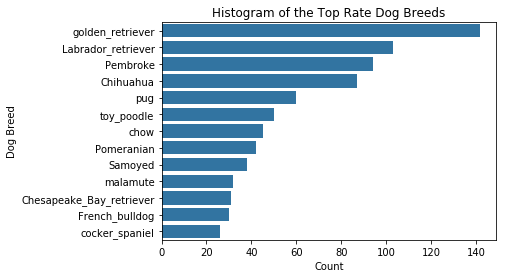

In [85]:
base_color = sb.color_palette()[0]

df_dog_breed = master_table.groupby('dog_type').filter(lambda x: len(x) >= 25)
breed_order = df_dog_breed['dog_type'].value_counts().index

sb.countplot(data = df_dog_breed, y = 'dog_type', color = base_color, order = breed_order)
plt.title('Histogram of the Top Rate Dog Breeds')
plt.xlabel('Count')
plt.ylabel('Dog Breed');

In [86]:
master_table['name'].value_counts()

None         483
Lucy          10
Cooper        10
Charlie       10
Oliver         9
Tucker         8
Penny          7
Winston        7
Daisy          7
Sadie          7
Koda           6
Jax            6
Toby           6
Oscar          5
Bella          5
Stanley        5
Lola           5
Leo            5
Maggie         4
Dexter         4
Duke           4
Bailey         4
Sophie         4
Gus            4
Oakley         4
George         4
Reggie         4
Louis          4
Cassie         4
Bear           4
            ... 
Timber         1
Asher          1
Sora           1
Taz            1
Harold         1
Boots          1
Dewey          1
Albus          1
Shelby         1
Pipsy          1
Lillie         1
Hermione       1
Adele          1
Jangle         1
Noah           1
Kyro           1
Kloey          1
Olaf           1
Grey           1
Trip           1
O              1
Liam           1
Kevon          1
Naphaniel      1
Marley         1
Sam            1
Peaches        1
Rose          

In [87]:
named_data = master_table[master_table['name'] != 'None']

In [88]:
named_data['name'].value_counts()

Charlie      10
Cooper       10
Lucy         10
Oliver        9
Tucker        8
Daisy         7
Penny         7
Sadie         7
Winston       7
Toby          6
Koda          6
Jax           6
Stanley       5
Oscar         5
Bella         5
Lola          5
Leo           5
Maggie        4
Duke          4
Bailey        4
Cassie        4
Sophie        4
Brody         4
Scooter       4
Reggie        4
Chester       4
Oakley        4
Finn          4
Bear          4
Gus           4
             ..
Glenn         1
Timber        1
Asher         1
Sora          1
Taz           1
Harold        1
Boots         1
Frönq         1
O             1
Apollo        1
Grey          1
Pipsy         1
Hermione      1
Adele         1
Jangle        1
Noah          1
Kyro          1
Kloey         1
Olaf          1
Lillie        1
Curtis        1
Trip          1
Liam          1
Kevon         1
Naphaniel     1
Marley        1
Sam           1
Peaches       1
Rose          1
Bookstore     1
Name: name, Length: 809,

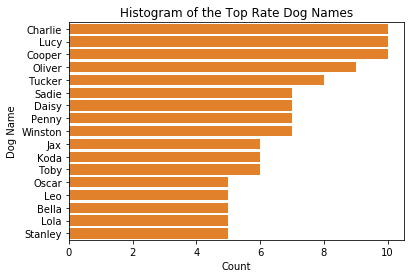

In [89]:
base_color = sb.color_palette()[1]

df_dog_name = named_data.groupby('name').filter(lambda x: len(x) >= 5)
breed_order = df_dog_name['name'].value_counts().index

sb.countplot(data = df_dog_name, y = 'name', color = base_color, order = breed_order)
plt.title('Histogram of the Top Rate Dog Names')
plt.xlabel('Count')
plt.ylabel('Dog Name');

(0, 50000)

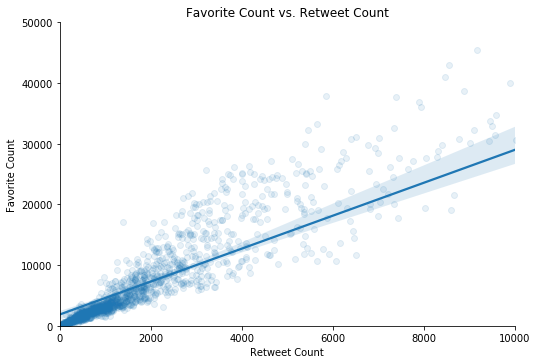

In [90]:
sb.lmplot(x="retweet_count",y="favorite_count",data=master_table,size = 5,aspect=1.5, scatter_kws={'alpha':1/10});
plt.title('Favorite Count vs. Retweet Count');
plt.xlabel('Retweet Count');
plt.xlim(0,10000)
plt.ylabel('Favorite Count');
plt.ylim(0,50000)

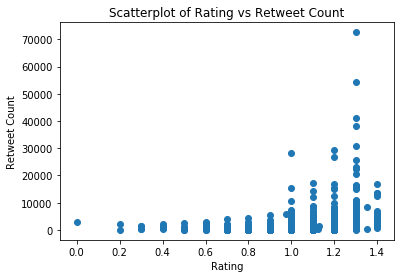

In [91]:
plt.scatter(data = master_table, x = 'rating', y = 'retweet_count')
plt.xlabel('Rating')
plt.ylabel('Retweet Count')
plt.title('Scatterplot of Rating vs Retweet Count');